In [ ]:
# Traffic Prediction Model using Weather and Event Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
df = pd.read_csv("Dataset_Uber Traffic.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%d/%m/%y %H:%M")
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Weekday'] = df['DateTime'].dt.weekday
df['Month'] = df['DateTime'].dt.month
df['Date'] = df['DateTime'].dt.date

In [4]:
# Simulate weather data
np.random.seed(42)
weather_data = pd.DataFrame({
    'DateTime': df['DateTime'].unique(),
    'Temperature': np.random.uniform(15, 35, size=df['DateTime'].nunique()),
    'Precipitation': np.random.choice([0, 0.1, 0.5, 1.0, 2.0], size=df['DateTime'].nunique(), p=[0.7, 0.1, 0.1, 0.05, 0.05]),
    'Humidity': np.random.uniform(40, 90, size=df['DateTime'].nunique()),
    'WindSpeed': np.random.uniform(0, 30, size=df['DateTime'].nunique())
})
df = df.merge(weather_data, on='DateTime', how='left')

# Simulate public event data
event_days = pd.to_datetime([
    "2015-11-14", "2015-12-25", "2016-01-01", "2016-03-08",
    "2016-04-21", "2016-08-15", "2016-10-02", "2016-11-14",
    "2017-01-26", "2017-08-15"
])
df['Is_Holiday'] = df['Date'].isin(event_days.date).astype(int)

In [5]:
# Features and target
features = ['Junction', 'Hour', 'Weekday', 'Month', 'Temperature', 'Precipitation', 'Humidity', 'WindSpeed', 'Is_Holiday']
target = 'Vehicles'
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Correct function
r2 = r2_score(y_test, y_pred)

print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 3))


RMSE: 11.14
R² Score: 0.695


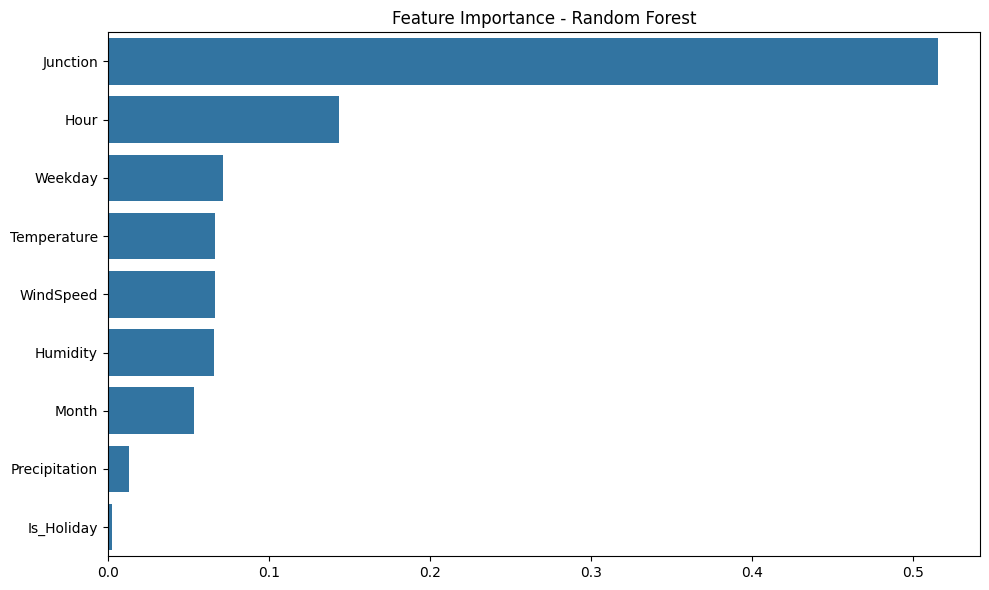

In [10]:
# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=np.array(features)[indices])
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


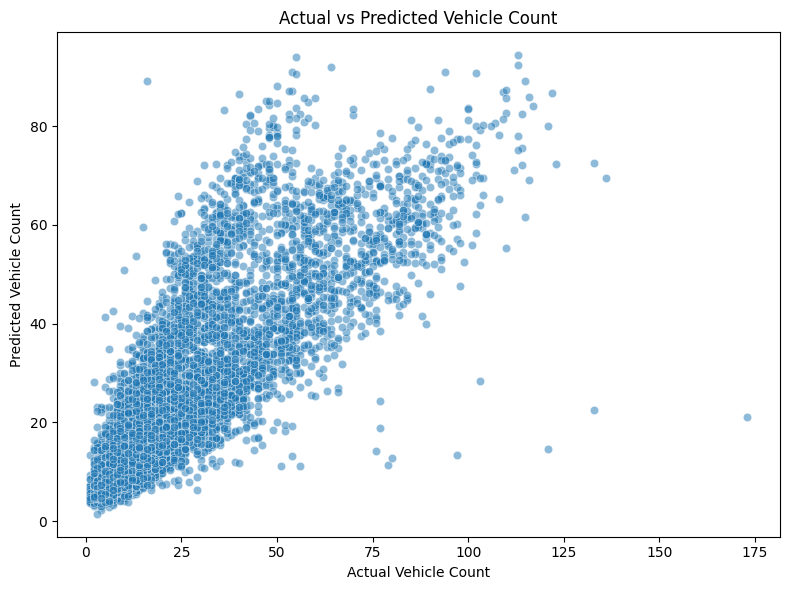

In [11]:

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Vehicle Count")
plt.ylabel("Predicted Vehicle Count")
plt.title("Actual vs Predicted Vehicle Count")
plt.tight_layout()
plt.show()

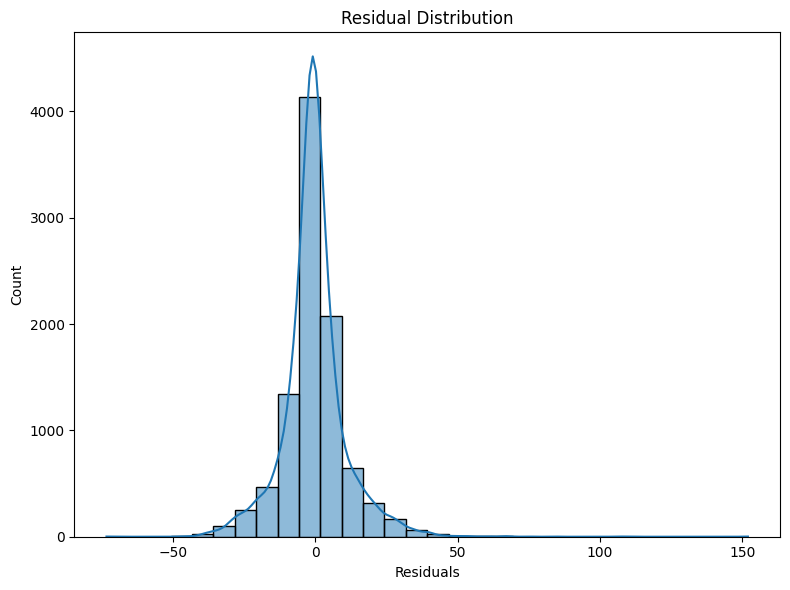

In [12]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.tight_layout()
plt.show()